In [3]:
#question1
def integerBreak(num):
    dp = [0] * (num + 1)
    dp[1] = 1
    factors = [[] for i in range(num + 1)]
    for i in range(2, num + 1):
        for j in range(1, i):
            product1 = j * dp[i - j]
            product2 = j * (i - j)
            if product1 >= product2:
                if product1 > dp[i]:
                    dp[i] = product1
                    factors[i] = factors[i - j] + [j]
            else:
                if product2 > dp[i]:
                    dp[i] = product2
                    factors[i] = [j] + [i - j]
    return dp[num], factors[num]
#example
num = 2001
max_product, factor_list = integerBreak(num)
print("最大乘积:", max_product)
print("正整数列:", factor_list)
print("正整数列大小为:", len(factor_list))

最大乘积: 1737308314051321188153737760718651536153003874190659056877100871667078366232891487026153897841099765525840472053348405269454221681971374832586973594416556121106547021236805348582131129375040043397265831014832807736305547123498116251702260708274705682933217067146110522636431100579531602737668533442551900963470357894587
正整数列: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3

##### （1）当n = 2001时，所求正整数列是什么？
由代码中的示例，我们可以知道当 n = 2001 时所求正整数列由 667 个 3 构成
##### （2）思路解释
看到这道题时，首先由正整数和确定可以想到是一个背包问题，想到可以通过动态规划来解决，我的想法是实现一个对背包的动态规划，同时记录下每种可能情况的正整数列，最后只需要输出和为n的最优正整数列即可<br>
思路如下：
1. 创建一个长度为 num+1 的列表 dp，来记录最大乘积，并初始化 dp[1] 为 1

3. 创建一个长度为 num+1 的二维列表 factors，用于记录每个整数拆分得到最大乘积时的正整数列，并将 factors 中的所有元素初始化为空列表

4. 使用两层循环遍历所有情况，并记录每种情况下的最优正整数列，其中核心的状态转移方程为 dp[i] = Max(j * dp[i - j], j * (i - j)) 1 <= j <= i - 1，

5. 最后得出的 dp[num] 和 factors[num]即为最优解

数据为: [1.0, 1024.0, 1048576.0, 1073741824.0, 1099511627776.0]
下图为对数话之后的增长趋势图


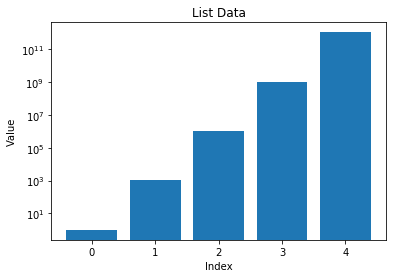

In [19]:
#question2
import matplotlib.pyplot as plt
nums = []
for i in range(10, 51, 10):
    nums.append(2 ** i / 1024)
print("数据为:", nums)
print("下图为对数化后的增长趋势图:")
plt.bar(range(len(nums)), nums)
plt.title('List Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.yscale('log')  # 使用对数刻度
plt.show()

In [1]:
#question3
def is_valid_state(state):
    if (state[1] == state[2] and state[0] != state[1]) or (state[2] == state[3] and state[0] != state[2]):
        return False
    return True

def dfs(state, path, visited):
    if state == (0, 0, 0, 0):
        # 找到了解决方案
        print("找到解决方案：", path)
        return

    for move in moves:
        new_state = tuple(state[i] + move[i] for i in range(4))
        if all(0 <= new_state[i] <= 1 for i in range(4)) and is_valid_state(new_state) and new_state not in visited:
            visited.add(new_state)
            dfs(new_state, path + [new_state], visited)
            visited.remove(new_state)

# 初始状态：(1, 1, 1, 1) 表示人、狼、羊、菜都在起始岸
initial_state = (1, 1, 1, 1)
# 移动方式
moves = [
    (-1, 0, 0, 0),
    (-1, -1, 0, 0),
    (-1, 0, -1, 0),
    (-1, 0, 0, -1),
    (1, 0, 0, 0),
    (1, 1, 0, 0),
    (1, 0, 1, 0),
    (1, 0, 0, 1)
]

visited = set()
visited.add(initial_state)

dfs(initial_state, [initial_state], visited)

找到解决方案： [(1, 1, 1, 1), (0, 1, 0, 1), (1, 1, 0, 1), (0, 0, 0, 1), (1, 0, 1, 1), (0, 0, 1, 0), (1, 0, 1, 0), (0, 0, 0, 0)]
找到解决方案： [(1, 1, 1, 1), (0, 1, 0, 1), (1, 1, 0, 1), (0, 1, 0, 0), (1, 1, 1, 0), (0, 0, 1, 0), (1, 0, 1, 0), (0, 0, 0, 0)]


In [27]:
#question4
def calculate(x):
    g = 0
    h = 0.00001
    dis = 0.0001
    for g in range(x + 1):
        if g * g <= x < (g + 1) * (g + 1):
            break
    time = 0
    while abs(x - g * g) > dis:
        time += 1
        g += h
    print("循环次数:", time)
    return g
#example
num = 2
print(f"{num}的开根结果为{calculate(num)}")
num = 10
print(f"{num}的开根结果为{calculate(num)}")

循环次数: 41418
2的开根结果为1.4141800000027134
循环次数: 16227
10的开根结果为3.162270000001063


In [29]:
#question5
def calculate_2(x):
    g = x / 2
    dis = 0.0001
    time = 0
    while abs(g * g - x) > dis:
        g = (g + x / g) / 2
        time += 1
    print("循环次数:", time)
    return g
#example
num = 2
print(f"{num}的开根结果为{calculate_2(num)}")
num = 10
print(f"{num}的开根结果为{calculate_2(num)}")

循环次数: 3
2的开根结果为1.4142156862745097
循环次数: 4
10的开根结果为3.1622776604441363


In [30]:
#question6
def calculate_1(x):
    g = x
    dis = 0.0001
    time = 0
    while abs(g * g - x) > dis:
        g = (g + x / g) / 2
        time += 1
    print("循环次数:", time)
    return g
def calculate_4(x):
    g = x / 4
    dis = 0.0001
    time = 0
    while abs(g * g - x) > dis:
        g = (g + x / g) / 2
        time += 1
    print("循环次数:", time)
    return g
#example
print("改为g = c")
num = 2
print(f"{num}的开根结果为{calculate_1(num)}")
num = 10
print(f"{num}的开根结果为{calculate_1(num)}")
print("#" * 10)
print("改为g = c / 2")
num = 2
print(f"{num}的开根结果为{calculate_4(num)}")
num = 10
print(f"{num}的开根结果为{calculate_4(num)}")

改为g = c
循环次数: 3
2的开根结果为1.4142156862745097
循环次数: 5
10的开根结果为3.162277665175675
##########
改为g = c / 2
循环次数: 4
2的开根结果为1.4142342859400734
循环次数: 3
10的开根结果为3.1622778816927752


#### 对比将g = c / 2改为g = c或者g = c / 4
结论为改变前后结果没有变化，但是通过将 g = c / 2改为g = c或者g = c / 4，可以大幅减少计算循环次数，节约时间

In [32]:
#question7
def calculate(x):
    g = x / 4
    dis = 0.0001
    while abs(g * g * g - x) > dis:
        g = (g + x / (g * g)) / 2
    return g
#example
num = 4
print(f"{num}的开三次根结果为{calculate(num)}")
num = 8
print(f"{num}的开三次根结果为{calculate(num)}")

4的开三次根结果为1.587409732044072
8的开三次根结果为2.0


In [20]:
#question8
import random
import math
cal_time = 1000000
print(f"计算次数为{cal_time}")
#####蒙特卡罗法#####
x_min = -1
x_max = 1
y_min = 0
y_max = 1
count_in = 0
point_num = cal_time
for i in range(point_num):
    x = random.uniform(x_min, x_max)
    y = random.uniform(y_min, y_max)
    if y <= math.sqrt(1 - x ** 2):
        count_in += 1
answer = count_in / point_num * 4
print(f"蒙特卡罗法估算的圆周率为: {answer}")
#####蒲丰投针法#####
x_min, x_max = -1, 1
y_min, y_max = -1, 1
point_num = cal_time
count_in = 0
for i in range(point_num):
    x = random.uniform(x_min, x_max)
    y = random.uniform(y_min, y_max)
    if (x ** 2 + y ** 2) <= 1:
        count_in += 1
area = 4 * count_in / point_num
num_pi = area
print(f"蒲丰投针法估算的圆周率为: {num_pi}")
#####无穷级数法#####
def calculate_pi(cal_num):
    pi = 0
    flag = 1
    for i in range(cal_num):
        term = 1 / (2 * i + 1) * flag
        pi += term
        flag *= -1
    pi *= 4
    return pi
print(f"无穷级数法估算的圆周率为: {calculate_pi(cal_time)}")
#####莱布尼茨级数#####
def calculate_pi_leibniz(n):
    pi = 0.0
    for k in range(n):
        term = ((-1) ** k) / (2 * k + 1)
        pi += term
    return 4 * pi
print(f"莱布尼茨级数估算的圆周率为: {calculate_pi_leibniz(cal_time)}")
#####尼尔森级数#####
def calculate_pi(num_terms):
    pi_estimate = 0
    sign = 1

    for i in range(num_terms):
        term = 1 / (2 * i + 1)
        pi_estimate += sign * term
        sign *= -1

    pi_estimate *= 4
    return pi_estimate
pi_approximation = calculate_pi(cal_time)
print(f"尼尔森级数估算的圆周率为: {pi_approximation}")

计算次数为1000000
蒙特卡罗法估算的圆周率为: 3.141928
蒲丰投针法估算的圆周率为: 3.141892
无穷级数法估算的圆周率为: 3.1415916535897743
莱布尼茨级数估算的圆周率为: 3.1415916535897743
尼尔森级数估算的圆周率为: 3.1415916535897743


In [13]:
#question9
import random
import math
x_min, x_max= 2, 3
y_min, y_max= 0, 21
point_num = 10000000
points = [(random.uniform(x_min, x_max), random.uniform(y_min, y_max)) for i in range(point_num)]
count_in = 0
for point in points:
    if point[1] <= point[0] * point[0] + 4 * point[0] * math.sin(point[0]):
        count_in += 1
cor_answer = 19 / 3 + 4 * (math.sin(3) - 3 * math.cos(3) +  + 2 * math.cos(2) - math.sin(2))
print("蒙特卡罗方法算出的结果是" + str(count_in / point_num * 21))
print(f"实际结果是{str(cor_answer)}")

蒙特卡罗方法算出的结果是11.8077813
实际结果是11.811358925098283
